In [1]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os
import networkx as nx
import numpy as np
import pandas as pd
from stellargraph import datasets
from IPython.display import display, HTML

In [2]:
dataset = datasets.Cora()
display(HTML(dataset.description))
G, node_subjects = dataset.load(largest_connected_component_only=True)

In [3]:
from stellargraph.data import BiasedRandomWalk

rw = BiasedRandomWalk(G)

walks = rw.run(
    nodes=list(G.nodes()),  # root nodes
    length=100,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
)
print("Number of random walks: {}".format(len(walks)))

Number of random walks: 24850


In [ ]:
#### w2v #####

In [4]:
from gensim.models import Word2Vec

str_walks = [[str(n) for n in walk] for walk in walks]
model = Word2Vec(str_walks, size=25, window=5, min_count=0, sg=1, workers=2, iter=1)

In [5]:
# The embedding vectors can be retrieved from model.wv using the node ID.
model.wv["19231"].shape

(25,)

In [7]:
#walks[0]

In [9]:
node_ids = model.wv.index2word

In [26]:
node_ids

['35',
 '6213',
 '1365',
 '3229',
 '910',
 '3231',
 '114',
 '4330',
 '19621',
 '2440',
 '6214',
 '1272',
 '4584',
 '24966',
 '2665',
 '887',
 '20193',
 '8224',
 '12576',
 '643221',
 '22563',
 '10169',
 '3191',
 '82920',
 '12182',
 '31353',
 '12350',
 '39890',
 '15429',
 '2658',
 '8703',
 '2696',
 '4804',
 '210871',
 '3220',
 '16819',
 '35922',
 '39127',
 '6334',
 '23738',
 '1688',
 '10177',
 '230879',
 '2653',
 '10796',
 '5086',
 '6910',
 '1481',
 '85352',
 '5348',
 '117',
 '642894',
 '34257',
 '54131',
 '54129',
 '4335',
 '35797',
 '20601',
 '35061',
 '3218',
 '153063',
 '36140',
 '41714',
 '28350',
 '79809',
 '5064',
 '65074',
 '38205',
 '3192',
 '108047',
 '28287',
 '3233',
 '205196',
 '31489',
 '10531',
 '20602',
 '22229',
 '6151',
 '89547',
 '46491',
 '17476',
 '3112',
 '45189',
 '33818',
 '287787',
 '1997',
 '6184',
 '18777',
 '126927',
 '1956',
 '84021',
 '6163',
 '7532',
 '77438',
 '2654',
 '6913',
 '3243',
 '23507',
 '45605',
 '503883',
 '10183',
 '56115',
 '12195',
 '10798',


In [27]:
import pickle

with open('D:/MSCS/GraphMining/GM_VE/gm_project/node_embeddings/nodeids', 'wb') as fp:
    pickle.dump(node_ids, fp)

In [11]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = node_subjects.loc[[int(node_id) for node_id in node_ids]]

In [27]:
type(node_targets)

pandas.core.series.Series

In [12]:
transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

In [13]:
alpha = 0.7
label_map = {l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [label_map[target] for target in node_targets]



In [14]:
label_map

{'Case_Based': 0,
 'Genetic_Algorithms': 1,
 'Neural_Networks': 2,
 'Probabilistic_Methods': 3,
 'Reinforcement_Learning': 4,
 'Rule_Learning': 5,
 'Theory': 6}

In [13]:
node_colours

[1,
 4,
 2,
 2,
 2,
 6,
 3,
 4,
 2,
 5,
 6,
 4,
 4,
 1,
 6,
 6,
 2,
 0,
 1,
 6,
 3,
 6,
 2,
 2,
 1,
 3,
 6,
 5,
 6,
 3,
 0,
 2,
 2,
 3,
 6,
 2,
 1,
 3,
 6,
 6,
 6,
 0,
 1,
 3,
 1,
 1,
 2,
 2,
 4,
 5,
 3,
 2,
 0,
 3,
 1,
 0,
 3,
 2,
 2,
 6,
 1,
 1,
 2,
 1,
 6,
 3,
 1,
 3,
 4,
 5,
 6,
 4,
 1,
 3,
 2,
 4,
 1,
 2,
 2,
 3,
 6,
 3,
 4,
 3,
 6,
 0,
 6,
 4,
 6,
 1,
 4,
 6,
 3,
 1,
 3,
 6,
 6,
 3,
 6,
 1,
 2,
 2,
 0,
 3,
 0,
 1,
 2,
 4,
 3,
 0,
 1,
 6,
 3,
 6,
 0,
 6,
 1,
 0,
 2,
 1,
 2,
 6,
 0,
 2,
 5,
 2,
 2,
 0,
 6,
 2,
 2,
 2,
 2,
 6,
 2,
 0,
 1,
 6,
 4,
 4,
 1,
 6,
 3,
 6,
 3,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 0,
 1,
 3,
 3,
 0,
 1,
 0,
 3,
 2,
 5,
 5,
 3,
 6,
 2,
 4,
 5,
 1,
 1,
 2,
 0,
 6,
 0,
 3,
 0,
 3,
 1,
 0,
 2,
 3,
 2,
 4,
 4,
 2,
 6,
 0,
 2,
 3,
 5,
 2,
 3,
 3,
 6,
 0,
 5,
 3,
 1,
 2,
 5,
 1,
 2,
 6,
 0,
 2,
 2,
 2,
 2,
 0,
 6,
 2,
 5,
 3,
 4,
 4,
 1,
 1,
 3,
 0,
 1,
 2,
 2,
 4,
 1,
 4,
 6,
 6,
 4,
 6,
 3,
 2,
 4,
 2,
 3,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 4,
 2,
 0,
 3,
 1,
 4,
 3,
 3,
 0,


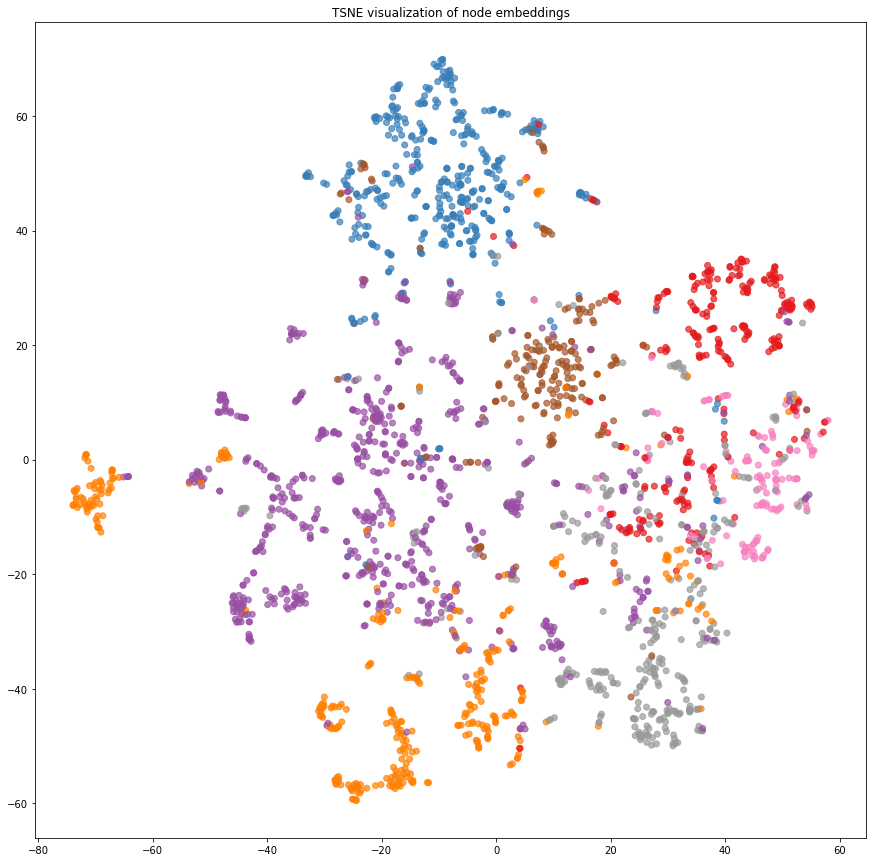

In [15]:
plt.figure(figsize=(15, 15))
plt.axes().set(aspect="equal")
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap=plt.cm.Set1,
    alpha=alpha,
)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()

In [16]:
np.savetxt("D:/MSCS/GraphMining/GM_VE/gm_project/node_embeddings/node_to_vec_d25.csv", node_embeddings, delimiter=',')

In [18]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

In [25]:
node_embeddings

array([[-1.3602474 , -0.15950313, -0.1426409 , ...,  0.49737838,
         0.0994202 , -0.8577464 ],
       [-0.16359484, -0.3338164 ,  0.02041082, ...,  0.8238423 ,
        -1.5833207 , -0.59354115],
       [-0.45504168,  0.7720338 ,  0.3040933 , ..., -0.17667276,
        -0.9823125 , -0.09195462],
       ...,
       [ 0.16394177, -0.22287144, -0.6219481 , ...,  0.23266421,
        -0.88710487, -0.4038062 ],
       [-0.3221432 ,  0.30625567, -0.55365944, ..., -0.20440517,
        -0.6244143 ,  0.58929336],
       [-0.35826734, -0.30455646, -0.47944084, ...,  0.6141963 ,
         0.62980276, -0.61360425]], dtype=float32)

In [23]:
#### training ######
x_train, x_test, y_train, y_test = train_test_split(node_embeddings, np.array(node_colours), test_size = 0.3, random_state=42)
subclf = SVC(kernel = 'rbf')
clf1 = OneVsOneClassifier(estimator=subclf)

clf1.fit(x_train, y_train)
clf1.score(x_test, y_test)


0.8471849865951743

In [24]:
clf1.score(x_train, y_train)

0.8895917193789534

In [23]:
import pickle
with open ('D:/MSCS/GraphMining/GM_VE/gm_project/node_embeddings/nodeids_default', 'rb') as fp:
    itemlist = pickle.load(fp)

In [25]:
itemlist

[35.0,
 1033.0,
 103482.0,
 103515.0,
 1050679.0,
 1103960.0,
 1103985.0,
 1109199.0,
 1112911.0,
 1113438.0,
 1113831.0,
 1114331.0,
 1117476.0,
 1119505.0,
 1119708.0,
 1120431.0,
 1123756.0,
 1125386.0,
 1127430.0,
 1127913.0,
 1128204.0,
 1128227.0,
 1128314.0,
 1128453.0,
 1128945.0,
 1128959.0,
 1128985.0,
 1129018.0,
 1129027.0,
 1129573.0,
 1129683.0,
 1129778.0,
 1130847.0,
 1130856.0,
 1131116.0,
 1131360.0,
 1131557.0,
 1131752.0,
 1133196.0,
 1133338.0,
 1136814.0,
 1137466.0,
 1152421.0,
 1152508.0,
 1153065.0,
 1153280.0,
 1153577.0,
 1153853.0,
 1153943.0,
 1154176.0,
 1154459.0,
 116552.0,
 12576.0,
 128540.0,
 132806.0,
 135130.0,
 141342.0,
 141347.0,
 148170.0,
 15670.0,
 1688.0,
 175291.0,
 178727.0,
 18582.0,
 190697.0,
 190706.0,
 1956.0,
 197054.0,
 198443.0,
 198653.0,
 206371.0,
 210871.0,
 229635.0,
 231249.0,
 248425.0,
 249421.0,
 254923.0,
 259701.0,
 259702.0,
 263279.0,
 263498.0,
 265203.0,
 273152.0,
 27510.0,
 28290.0,
 286500.0,
 287787.0,
 28851.0,
 

In [28]:
for i in node_targets:
    print(i)

Genetic_Algorithms
Reinforcement_Learning
Neural_Networks
Neural_Networks
Neural_Networks
Theory
Probabilistic_Methods
Reinforcement_Learning
Neural_Networks
Rule_Learning
Theory
Reinforcement_Learning
Reinforcement_Learning
Genetic_Algorithms
Theory
Theory
Neural_Networks
Case_Based
Genetic_Algorithms
Theory
Probabilistic_Methods
Theory
Neural_Networks
Neural_Networks
Genetic_Algorithms
Probabilistic_Methods
Theory
Rule_Learning
Theory
Probabilistic_Methods
Case_Based
Neural_Networks
Neural_Networks
Probabilistic_Methods
Theory
Neural_Networks
Genetic_Algorithms
Probabilistic_Methods
Theory
Theory
Theory
Case_Based
Genetic_Algorithms
Probabilistic_Methods
Genetic_Algorithms
Genetic_Algorithms
Neural_Networks
Neural_Networks
Reinforcement_Learning
Rule_Learning
Probabilistic_Methods
Neural_Networks
Case_Based
Probabilistic_Methods
Genetic_Algorithms
Case_Based
Probabilistic_Methods
Neural_Networks
Neural_Networks
Theory
Genetic_Algorithms
Genetic_Algorithms
Neural_Networks
Genetic_Algo

Theory
Neural_Networks
Rule_Learning
Neural_Networks
Genetic_Algorithms
Neural_Networks
Genetic_Algorithms
Case_Based
Probabilistic_Methods
Genetic_Algorithms
Reinforcement_Learning
Neural_Networks
Neural_Networks
Neural_Networks
Neural_Networks
Neural_Networks
Neural_Networks
Theory
Case_Based
Reinforcement_Learning
Case_Based
Neural_Networks
Neural_Networks
Reinforcement_Learning
Genetic_Algorithms
Reinforcement_Learning
Rule_Learning
Theory
Neural_Networks
Probabilistic_Methods
Case_Based
Genetic_Algorithms
Probabilistic_Methods
Reinforcement_Learning
Case_Based
Genetic_Algorithms
Case_Based
Genetic_Algorithms
Rule_Learning
Neural_Networks
Neural_Networks
Neural_Networks
Theory
Neural_Networks
Probabilistic_Methods
Neural_Networks
Theory
Theory
Theory
Reinforcement_Learning
Neural_Networks
Neural_Networks
Neural_Networks
Neural_Networks
Genetic_Algorithms
Reinforcement_Learning
Theory
Neural_Networks
Genetic_Algorithms
Neural_Networks
Theory
Genetic_Algorithms
Neural_Networks
Geneti

In [29]:
nt = node_subjects.loc[[int(node_id) for node_id in itemlist]]
node_colours = [label_map[target] for target in nt]

In [31]:
node_colours

[1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 6,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 2,
 0,
 0,
 2,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 4,
 4,
 4,
 4,
 4,


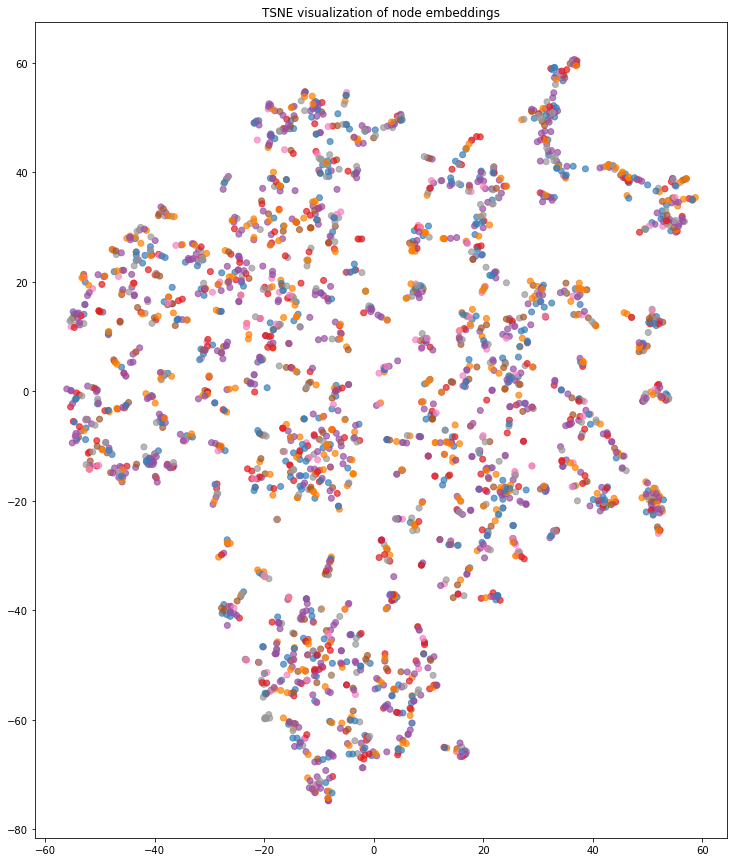

In [32]:
plt.figure(figsize=(15, 15))
plt.axes().set(aspect="equal")
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap=plt.cm.Set1,
    alpha=alpha,
)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()